In [116]:
#IMPORTING THE PACKAGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [43]:
#IMPORTING THE DATASET
Data=pd.read_csv("pima_diabetes.csv")

In [44]:
#EXPLORING THE DATA
Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
Data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [46]:
Data.shape

(768, 9)

In [47]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [48]:
#CLEANING DATA
#checking for missing data
Data.isnull().sum()
Data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

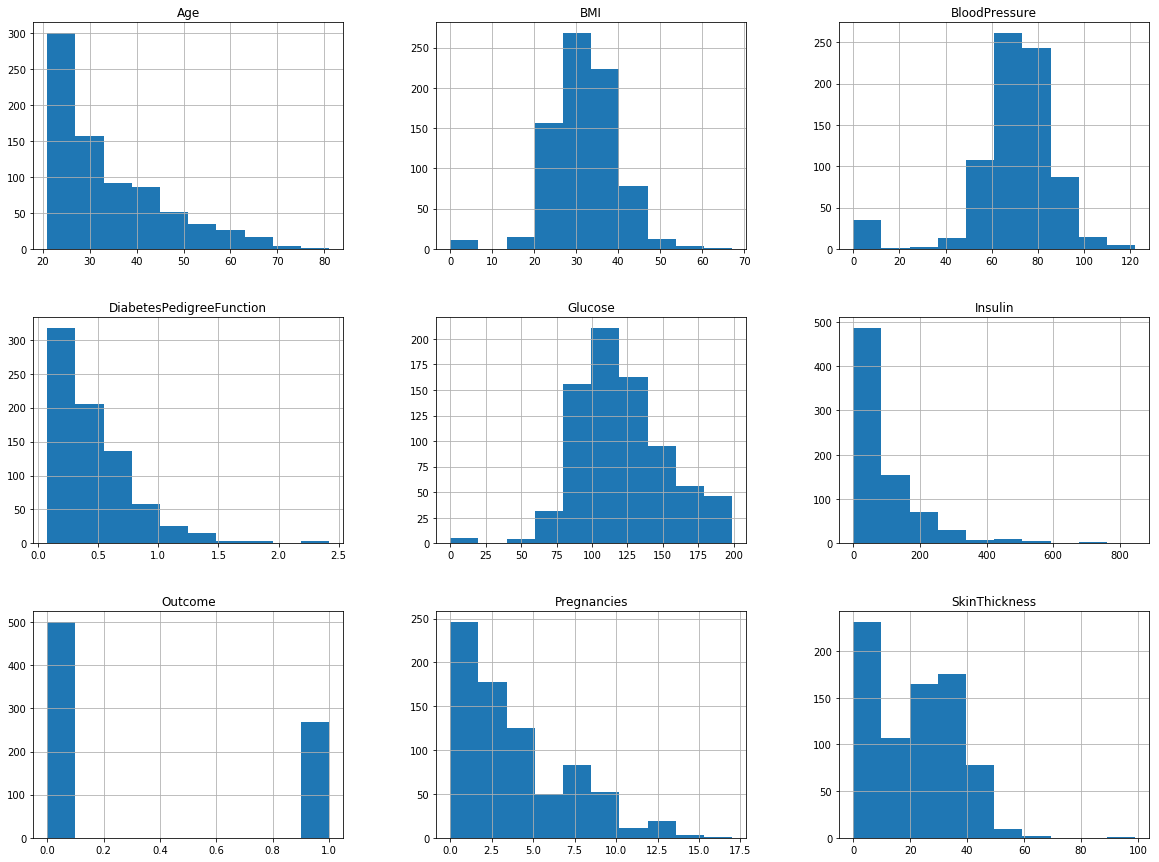

In [49]:
#checking for outliers
Data.hist(figsize=(20,15)
plt.show()

In [50]:
#missing datas are identified 
#BMI cannot be zero
#Blood pressure cannot be zero
#Glucose level cannot be zero
#Skin thickness can not be zero

In [51]:
a=Data['Glucose']==0
a.value_counts()

False    763
True       5
Name: Glucose, dtype: int64

In [52]:
b=Data['BloodPressure']==0
b.value_counts()

False    733
True      35
Name: BloodPressure, dtype: int64

In [53]:
c=Data['SkinThickness']==0
c.value_counts()

False    541
True     227
Name: SkinThickness, dtype: int64

In [54]:
d=Data['BMI']==0
d.value_counts()

False    757
True      11
Name: BMI, dtype: int64

In [55]:
#Glucose having value zero can be dropped
#BloodPressure having value zero can be dropped
#BMI having value zero can be dropped
#SkinThickness having value zero cannot be dropped since it contains huge number of rows

In [56]:
Data.drop(Data[ Data['Glucose'] == 0 ].index, inplace=True)
Data.drop(Data[ Data['BMI'] == 0 ].index, inplace=True)
Data.drop(Data[ Data['BloodPressure'] == 0 ].index, inplace=True)

In [90]:
#Finding median of the SkinThicknes and substituting the same for all zero values
medianSK=Data['SkinThickness'].median()
Data['SkinThickness']=Data['SkinThickness'].replace(to_replace=0, value=medianSK)

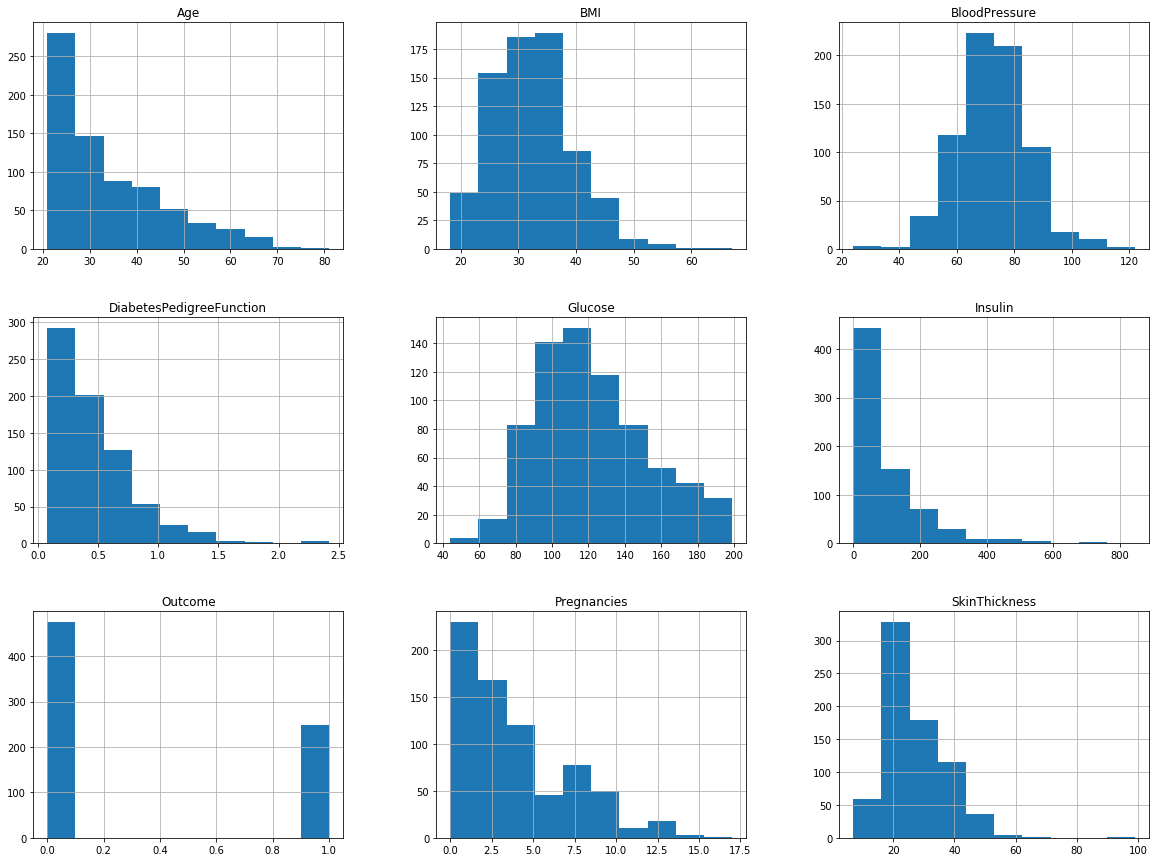

In [91]:
Data.hist(figsize=(20,15))
plt.show()

In [92]:
#let's know the corelation between the features
cor=Data.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,0.035246,-0.080059,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.178382,0.337896,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.157107,-0.046856,0.287403,-0.000075,0.324897,0.166703
SkinThickness,0.035246,0.178382,0.157107,1.000000,0.217027,0.562342,0.136950,0.062106,0.200386
Insulin,-0.080059,0.337896,-0.046856,0.217027,1.000000,0.191831,0.182656,-0.049412,0.145488
BMI,0.012342,0.223276,0.287403,0.562342,0.191831,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.136950,0.182656,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,0.062106,-0.049412,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.200386,0.145488,0.299375,0.184947,0.245741,1.000000


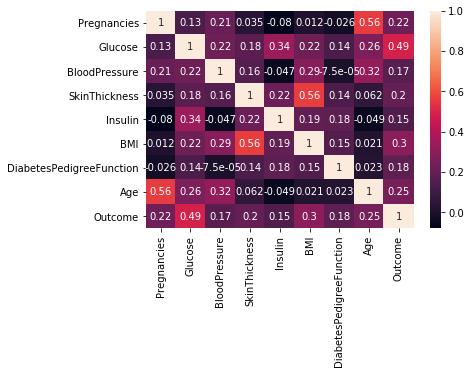

In [93]:
sns.heatmap(cor,annot=True,)
plt.show()

In [ ]:
#from abouve heatplot we can identify that there exists a co-relation between unsual features like
#Glucose and BloodPressure
#Pregnancies and BloodPressure
#BMI and BloodPressure

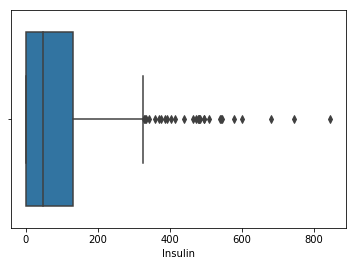

In [122]:
#Checking for Outliers
sns.boxplot(x=Data['Insulin'])
plt.show()

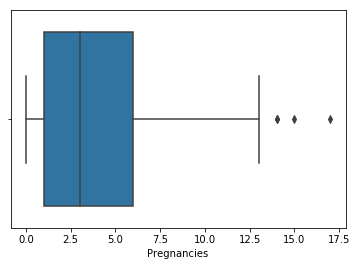

In [123]:
sns.boxplot(x=Data['Pregnancies'])
plt.show()

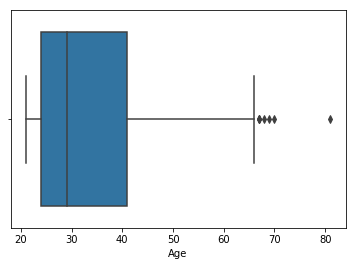

In [124]:
sns.boxplot(x=Data['Age'])
plt.show()

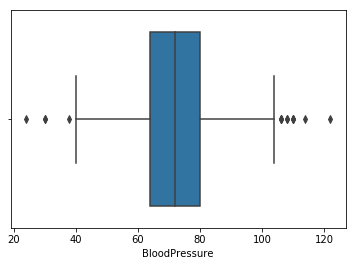

In [126]:
sns.boxplot(x=Data['BloodPressure'])
plt.show()

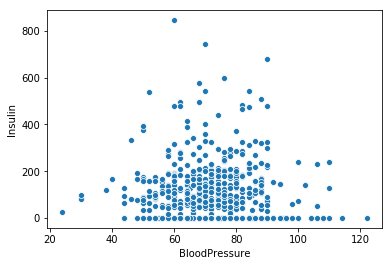

In [131]:
sns.scatterplot(x=Data['BloodPressure'],y=Data['Insulin'])
plt.show()

In [ ]:
#from above we can know that the outliers are more in Insuline and BloodPressure

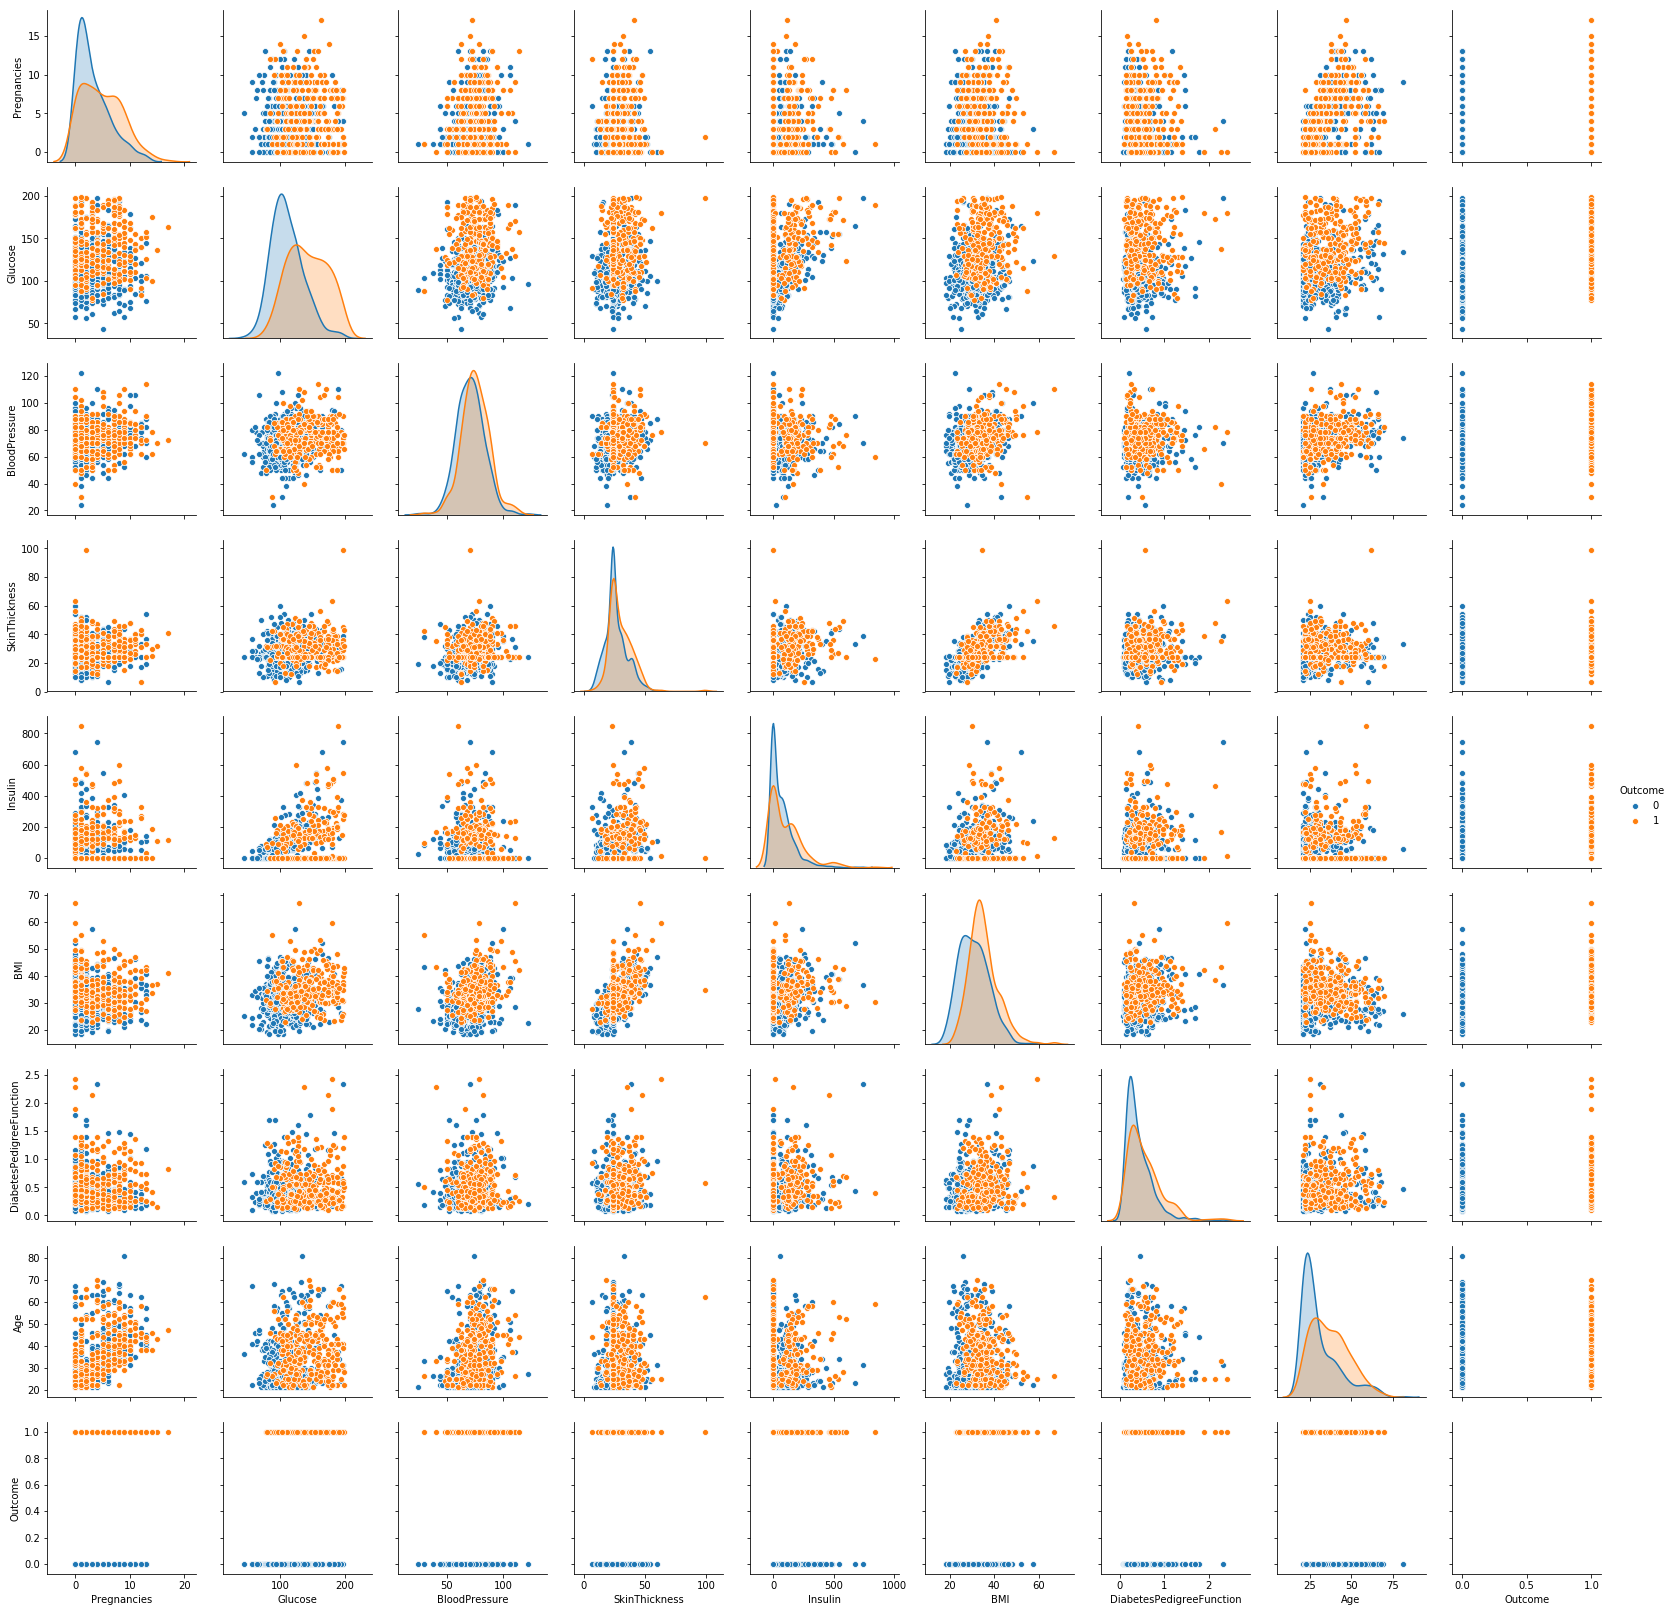

In [98]:
#from pair plot we can get more insight on the co-relation of the features with Outcome
sns.pairplot(data=Data, hue='Outcome')
plt.show()

In [132]:
#from abouve pairplot we can note that 
#Linearity exists between:1) Glucose and Age
                    #2) BloodPressure and Glucose, BloodPressure and SkinThickness ,BloodPressure and DiabetesPedigreeFunction
                    #3) SkinThickness and Glucose, SkinThickness and BMI, SkinThickness and Age
                    #4) DiabetesPedigreeFunction and Age, DiabetesPedigreeFunction and BMI 

In [133]:
#from data we can note that the factors Age, Insuline, BloodPressure, SkinThickness and BMI have major infuence on the Outcome being Positive

In [ ]:
#SAVING FILES
pd.read